In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import NMF
import scipy.cluster.hierarchy as hac 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.express as px

In [2]:
def zscore_bseline(input_mat):
    use_unit_z = np.zeros(input_mat.shape)
    for item in range(input_mat.shape[0]):
        use_unit = input_mat[item]
        unit_baseline = use_unit[0:1500]
        unit_baseline_mean = np.mean(unit_baseline)
        unit_baseline_std = np.std(unit_baseline)
        use_unit_z[item] = (use_unit - unit_baseline_mean)/unit_baseline_std
    return use_unit_z

In [3]:
all_hg_ave_activity = loadmat("processed_data/all_cue_ecog.mat")
ecog_hg_onset_mean = all_hg_ave_activity['ecog_hg_onset_mean']
ecog_hg_onset_sem = all_hg_ave_activity['ecog_hg_onset_sem']
ecog_hg_sus_mean = all_hg_ave_activity['ecog_hg_sus_mean']
ecog_hg_sus_sem = all_hg_ave_activity['ecog_hg_sus_sem']
ecog_hg_three_mean = all_hg_ave_activity['ecog_hg_three_mean']
ecog_hg_three_sem = all_hg_ave_activity['ecog_hg_three_sem']

In [4]:
ecog_hg_mean = np.concatenate((ecog_hg_onset_mean, ecog_hg_sus_mean, ecog_hg_three_mean))
ecog_hg_mean.shape

ecog_hg_mean_z = zscore_bseline(ecog_hg_mean)

ecog_hg_good = np.delete(ecog_hg_mean_z, np.where((ecog_hg_mean_z[:, :1500] >= 5))[0], axis=0)
ecog_hg_good = ecog_hg_good - ecog_hg_good.min()


(220, 5000)

In [116]:
use_cmap = sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

In [117]:
NMF_input = ecog_hg_good[:, 3000:]
NMF_input = NMF_input - NMF_input.min()
model_stg_speech = NMF(n_components=5, init='random', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.0000001, 
            max_iter=250, alpha_W=0.01)
NMF_output_stg_speech = model_stg_speech.fit_transform(NMF_input)


In [126]:
NMF_input = zscore_bseline(cue_mat_1)[:, 3000:]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0, solver='mu')
NMF_model_speech = model.fit(NMF_input)

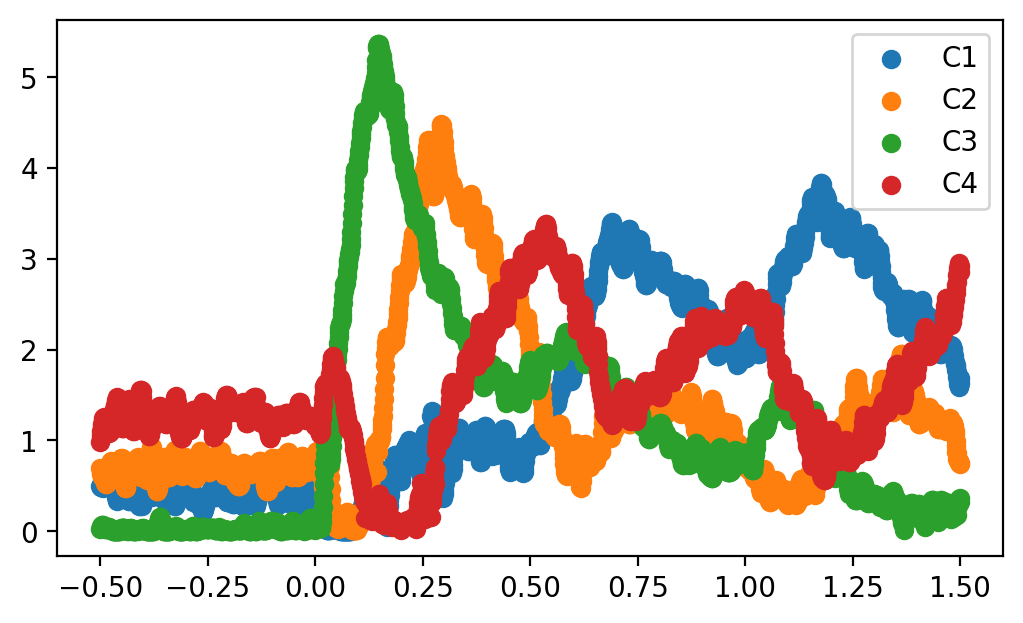

In [118]:
NMF_input = ecog_hg_good[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()
model_stg = NMF(n_components=5, init='random', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.0000001, 
            max_iter=250, alpha_W=0.01)
NMF_output = model_stg.fit_transform(NMF_input)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-0.5, 1.5, 2000)

plt.scatter(x=x_lab, y=model_stg.components_[0], label='C1')
plt.scatter(x=x_lab, y=model_stg.components_[1], label='C2')
plt.scatter(x=x_lab, y=model_stg.components_[2], label='C3')
plt.scatter(x=x_lab, y=model_stg.components_[3], label='C4')
#plt.scatter(x=x_lab, y=model_stg.components_[4], label='C5')
#plt.scatter(x=x_lab, y=model.components_[5], label='C6')
#plt.scatter(x=x_lab, y=model.components_[6], label='C7')
#plt.scatter(x=x_lab, y=model.components_[7], label='C8')

plt.legend()
plt.show();

In [29]:
all_unit_ave_activity = loadmat("processed_data/all_unit_ave_activity.mat")
cue_mat_1 = all_unit_ave_activity['cue_mat_1']
cue_mat_all = all_unit_ave_activity['cue_mat_all']
cue_mat_1_sem = all_unit_ave_activity['cue_mat_1_sem']
cue_mat_all_sem = all_unit_ave_activity['cue_mat_all_sem']

In [38]:
cue_mat_1.shape
ecog_hg_good.shape

(205, 5000)

(201, 5000)

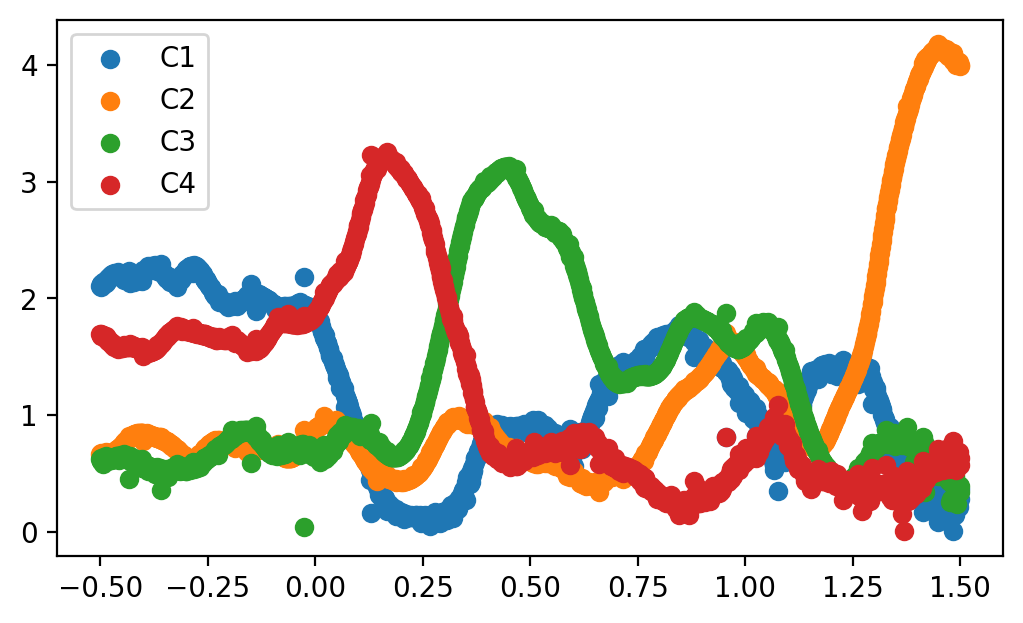

In [127]:
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', random_state=0, solver='mu')
NMF_model_auditory = model.fit(NMF_input)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-0.5, 1.5, 2000)

plt.scatter(x=x_lab, y=NMF_model_auditory.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model_auditory.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model_auditory.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model_auditory.components_[3], label='C4')
#plt.scatter(x=x_lab, y=NMF_model_auditory.components_[4], label='C5')

plt.legend()
plt.show();

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.optimize import linear_sum_assignment


In [44]:
NMF_model_auditory
model_stg

NMF(init='random', n_components=5, random_state=0)

NMF(alpha_W=0.01, init='random', max_iter=250, n_components=5, random_state=0,
    solver='mu', tol=1e-07)

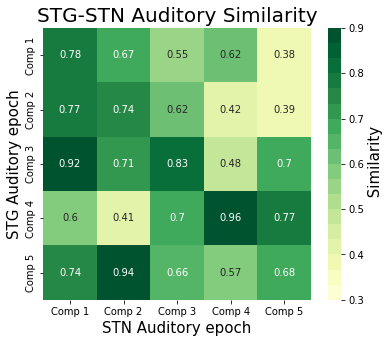

In [128]:
# Example data: two matrices of 5 components over time
# Each matrix has shape (time_points, 5), assuming 10 time points
matrix_1 = NMF_model_auditory.components_.T
matrix_2 = model_stg.components_.T

# Compute the cosine similarity between the components of the two matrices
# Transpose the matrices so that the cosine similarity is calculated between columns (components)
similarity_matrix = cosine_similarity(matrix_1.T, matrix_2.T)


# Use the Hungarian algorithm to find the optimal reordering of the second matrix
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix

# Reorder the second matrix based on the Hungarian algorithm result
reordered_similarity_matrix = similarity_matrix[:, col_ind]


# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(reordered_similarity_matrix, annot=True, cmap=use_cmap, ax=ax, 
            xticklabels=[f"Comp {i+1}" for i in range(5)], 
            yticklabels=[f"Comp {i+1}" for i in range(5)], 
            cbar_kws={'label': ' Similarity'}, vmax=0.9, vmin=0.3)
ax.figure.axes[-1].yaxis.label.set_size(15)
#ax.figure.axes[-1].tick_params=

ax.set_title("STG-STN Auditory Similarity", fontsize=20)
ax.set_xlabel('STN Auditory epoch', fontsize=15)
ax.set_ylabel('STG Auditory epoch', fontsize=15)

plt.show();

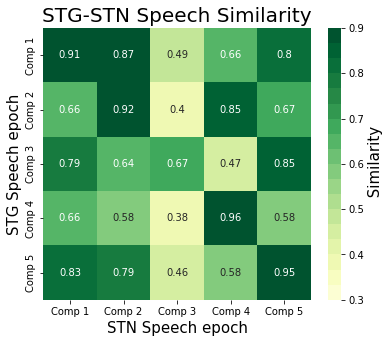

In [129]:
# Example data: two matrices of 5 components over time
# Each matrix has shape (time_points, 5), assuming 10 time points
matrix_1 = NMF_model_speech.components_.T
matrix_2 = model_stg_speech.components_.T

# Compute the cosine similarity between the components of the two matrices
# Transpose the matrices so that the cosine similarity is calculated between columns (components)
similarity_matrix = cosine_similarity(matrix_1.T, matrix_2.T)


# Use the Hungarian algorithm to find the optimal reordering of the second matrix
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix

# Reorder the second matrix based on the Hungarian algorithm result
reordered_similarity_matrix = similarity_matrix[:, col_ind]


# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(reordered_similarity_matrix, annot=True, cmap=use_cmap, ax=ax, 
            xticklabels=[f"Comp {i+1}" for i in range(5)], 
            yticklabels=[f"Comp {i+1}" for i in range(5)], 
            cbar_kws={'label': ' Similarity'}, vmax=0.9, vmin=0.3)
ax.figure.axes[-1].yaxis.label.set_size(15)
#ax.figure.axes[-1].tick_params=

ax.set_title("STG-STN Speech Similarity", fontsize=20)
ax.set_xlabel('STN Speech epoch', fontsize=15)
ax.set_ylabel('STG Speech epoch', fontsize=15)

plt.show();

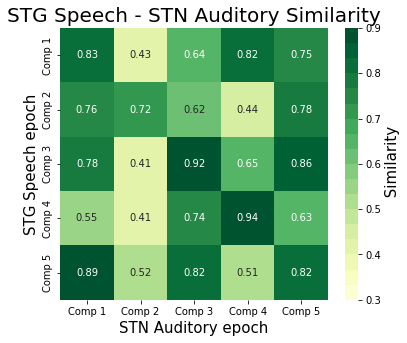

In [130]:
# Example data: two matrices of 5 components over time
# Each matrix has shape (time_points, 5), assuming 10 time points
matrix_1 = NMF_model_auditory.components_.T
matrix_2 = model_stg_speech.components_.T

# Compute the cosine similarity between the components of the two matrices
# Transpose the matrices so that the cosine similarity is calculated between columns (components)
similarity_matrix = cosine_similarity(matrix_1.T, matrix_2.T)


# Use the Hungarian algorithm to find the optimal reordering of the second matrix
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix

# Reorder the second matrix based on the Hungarian algorithm result
reordered_similarity_matrix = similarity_matrix[:, col_ind]


# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(reordered_similarity_matrix, annot=True, cmap=use_cmap, ax=ax, 
            xticklabels=[f"Comp {i+1}" for i in range(5)], 
            yticklabels=[f"Comp {i+1}" for i in range(5)], 
            cbar_kws={'label': ' Similarity'}, vmax=0.9, vmin=0.3)
ax.figure.axes[-1].yaxis.label.set_size(15)
#ax.figure.axes[-1].tick_params=

ax.set_title("STG Speech - STN Auditory Similarity", fontsize=20)
ax.set_xlabel('STN Auditory epoch', fontsize=15)
ax.set_ylabel('STG Speech epoch', fontsize=15)

plt.show();

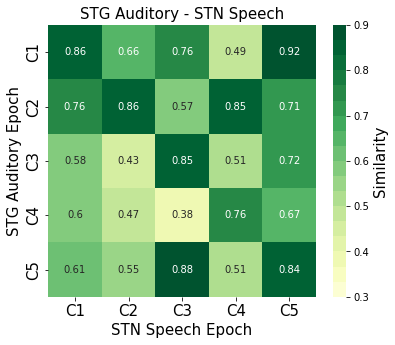

In [142]:
# Example data: two matrices of 5 components over time
# Each matrix has shape (time_points, 5), assuming 10 time points
matrix_1 = NMF_model_speech.components_.T
matrix_2 = model_stg.components_.T

# Compute the cosine similarity between the components of the two matrices
# Transpose the matrices so that the cosine similarity is calculated between columns (components)
similarity_matrix = cosine_similarity(matrix_1.T, matrix_2.T)


# Use the Hungarian algorithm to find the optimal reordering of the second matrix
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix

# Reorder the second matrix based on the Hungarian algorithm result
reordered_similarity_matrix = similarity_matrix[:, col_ind]


# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
g = sns.heatmap(reordered_similarity_matrix, annot=True, cmap=use_cmap, ax=ax, 
            xticklabels=[f"C{i+1}" for i in range(5)], 
            yticklabels=[f"C{i+1}" for i in range(5)], 
            cbar_kws={'label': 'Similarity'}, vmax=0.9, vmin=0.3)
g.tick_params(axis='both', labelsize=15)

ax.figure.axes[-1].yaxis.label.set_size(15)
#ax.figure.axes[-1].tick_params=

ax.set_title("STG Auditory - STN Speech", fontsize=15)
ax.set_xlabel('STN Speech Epoch', fontsize=15)
ax.set_ylabel('STG Auditory Epoch', fontsize=15)

plt.show();

In [60]:
from scipy.stats import pearsonr

def pearson_similarity_matrix(matrix_1, matrix_2):
    n_components = matrix_1.shape[1]
    similarity_matrix = np.zeros((n_components, n_components))
    
    for i in range(n_components):
        for j in range(n_components):
            similarity_matrix[i, j], _ = pearsonr(matrix_1[:, i], matrix_2[:, j])
    
    return similarity_matrix


In [222]:
n_comp = 5

# STN auditory
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stn_auditory = model.fit(NMF_input)


# STN speech
NMF_input = zscore_bseline(cue_mat_1)[:, 3000:]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stn_speech = model.fit(NMF_input)


# STG auditory
NMF_input = ecog_hg_good[:, 1000 :3000]
NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stg_auditory = model.fit(NMF_input)


# STG speech
NMF_input = ecog_hg_good[:, 3000:]
NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stg_speech = model.fit(NMF_input)


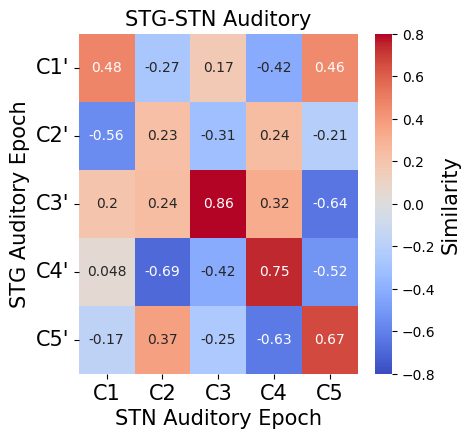

In [223]:
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_auditory.components_

similarity_matrix = pearson_similarity_matrix(matrix_1.T, matrix_2.T)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix
reordered_similarity_matrix = similarity_matrix[:, col_ind]

fig, ax = plt.subplots(figsize=(4.5, 4.5), dpi=100)
g = sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', ax=ax, 
            xticklabels=[f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], 
            yticklabels=[f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], 
            cbar_kws={'label': 'Similarity'}, vmax=0.8, vmin=-0.8)
g.tick_params(axis='both', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.tick_params(axis='y', rotation=0)

ax.set_title("STG-STN Auditory", fontsize=15)
ax.set_xlabel('STN Auditory Epoch', fontsize=15)
ax.set_ylabel('STG Auditory Epoch', fontsize=15)

plt.show();

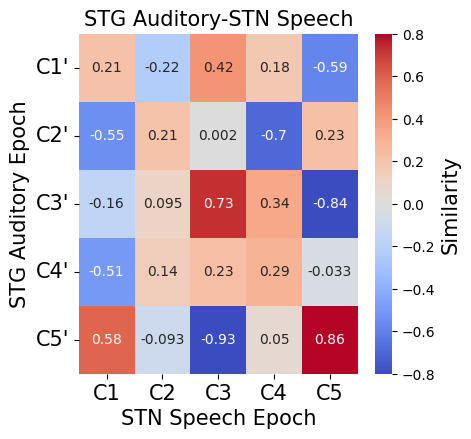

In [224]:
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_auditory.components_

similarity_matrix = pearson_similarity_matrix(matrix_1.T, matrix_2.T)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix
reordered_similarity_matrix = similarity_matrix[:, col_ind]

fig, ax = plt.subplots(figsize=(4.5, 4.5), dpi=100)
g = sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', ax=ax, 
            xticklabels=[f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], 
            yticklabels=[f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], 
            cbar_kws={'label': 'Similarity'}, vmax=0.8, vmin=-0.8)
g.tick_params(axis='both', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.tick_params(axis='y', rotation=0)

ax.set_title("STG Auditory-STN Speech", fontsize=15)
ax.set_xlabel('STN Speech Epoch', fontsize=15)
ax.set_ylabel('STG Auditory Epoch', fontsize=15)

plt.show();

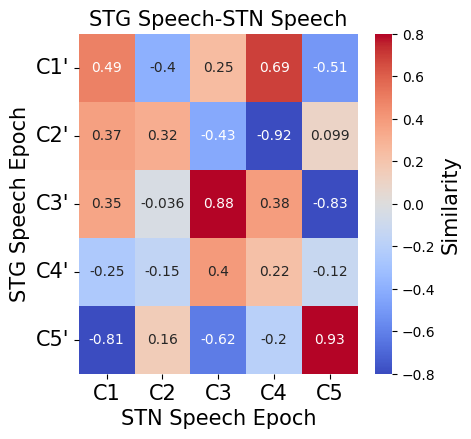

In [225]:
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_speech.components_

similarity_matrix = pearson_similarity_matrix(matrix_1.T, matrix_2.T)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix
reordered_similarity_matrix = similarity_matrix[:, col_ind]

fig, ax = plt.subplots(figsize=(4.5, 4.5), dpi=100)
g = sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', ax=ax, 
            xticklabels=[f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], 
            yticklabels=[f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], 
            cbar_kws={'label': 'Similarity'}, vmax=0.8, vmin=-0.8)
g.tick_params(axis='both', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.tick_params(axis='y', rotation=0)

ax.set_title("STG Speech-STN Speech", fontsize=15)
ax.set_xlabel('STN Speech Epoch', fontsize=15)
ax.set_ylabel('STG Speech Epoch', fontsize=15)

plt.show();

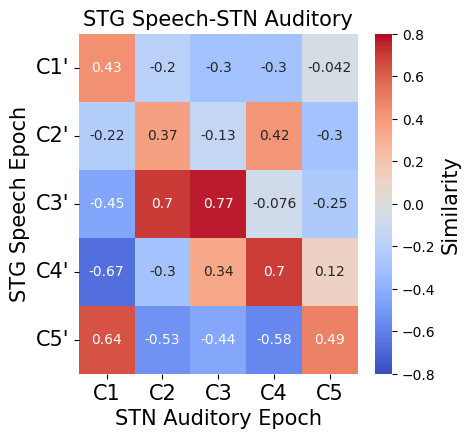

In [226]:
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_speech.components_

similarity_matrix = pearson_similarity_matrix(matrix_1.T, matrix_2.T)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix
reordered_similarity_matrix = similarity_matrix[:, col_ind]

fig, ax = plt.subplots(figsize=(4.5, 4.5), dpi=100)
g = sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', ax=ax, 
            xticklabels=[f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], 
            yticklabels=[f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], 
            cbar_kws={'label': 'Similarity'}, vmax=0.8, vmin=-0.8)
g.tick_params(axis='both', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.tick_params(axis='y', rotation=0)

ax.set_title("STG Speech-STN Auditory", fontsize=15)
ax.set_xlabel('STN Auditory Epoch', fontsize=15)
ax.set_ylabel('STG Speech Epoch', fontsize=15)

plt.show();

In [217]:
n_comp = 5

# STN auditory
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.0000001, 
            max_iter=250, alpha_W=0.01)
NMF_model_stn_auditory = model.fit(NMF_input)


# STN speech
NMF_input = zscore_bseline(cue_mat_1)[:, 3000:]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=5, init='random', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.0000001, 
            max_iter=250, alpha_W=0.01)
NMF_model_stn_speech = model.fit(NMF_input)


# STG auditory
NMF_input = ecog_hg_good[:, 1000 :3000]
NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stg_auditory = model.fit(NMF_input)


# STG speech
NMF_input = ecog_hg_good[:, 3000:]
NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stg_speech = model.fit(NMF_input)


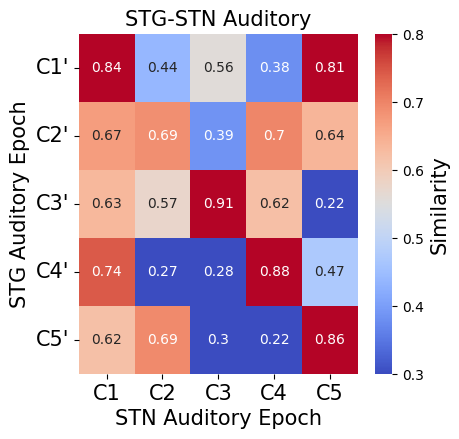

In [218]:
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_auditory.components_

similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix
reordered_similarity_matrix = similarity_matrix[:, col_ind]

fig, ax = plt.subplots(figsize=(4.5, 4.5), dpi=100)
g = sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', ax=ax, 
            xticklabels=[f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], 
            yticklabels=[f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], 
            cbar_kws={'label': 'Similarity'}, vmax=0.8, vmin=0.3)
g.tick_params(axis='both', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.tick_params(axis='y', rotation=0)

ax.set_title("STG-STN Auditory", fontsize=15)
ax.set_xlabel('STN Auditory Epoch', fontsize=15)
ax.set_ylabel('STG Auditory Epoch', fontsize=15)

plt.show();

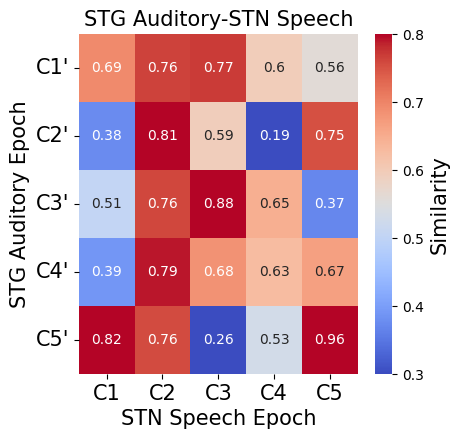

In [219]:
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_auditory.components_

similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix
reordered_similarity_matrix = similarity_matrix[:, col_ind]

fig, ax = plt.subplots(figsize=(4.5, 4.5), dpi=100)
g = sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', ax=ax, 
            xticklabels=[f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], 
            yticklabels=[f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], 
            cbar_kws={'label': 'Similarity'}, vmax=0.8, vmin=0.3)
g.tick_params(axis='both', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.tick_params(axis='y', rotation=0)

ax.set_title("STG Auditory-STN Speech", fontsize=15)
ax.set_xlabel('STN Speech Epoch', fontsize=15)
ax.set_ylabel('STG Auditory Epoch', fontsize=15)

plt.show();

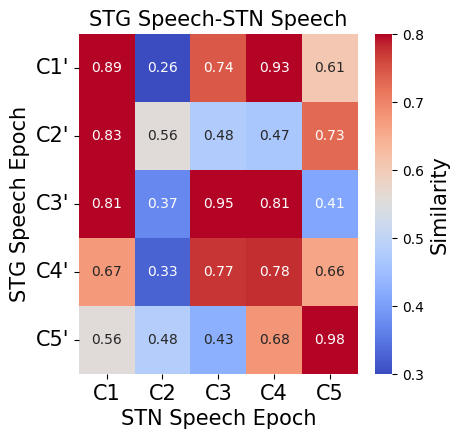

In [220]:
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_speech.components_

similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix
reordered_similarity_matrix = similarity_matrix[:, col_ind]

fig, ax = plt.subplots(figsize=(4.5, 4.5), dpi=100)
g = sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', ax=ax, 
            xticklabels=[f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], 
            yticklabels=[f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], 
            cbar_kws={'label': 'Similarity'}, vmax=0.8, vmin=0.3)
g.tick_params(axis='both', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.tick_params(axis='y', rotation=0)

ax.set_title("STG Speech-STN Speech", fontsize=15)
ax.set_xlabel('STN Speech Epoch', fontsize=15)
ax.set_ylabel('STG Speech Epoch', fontsize=15)

plt.show();

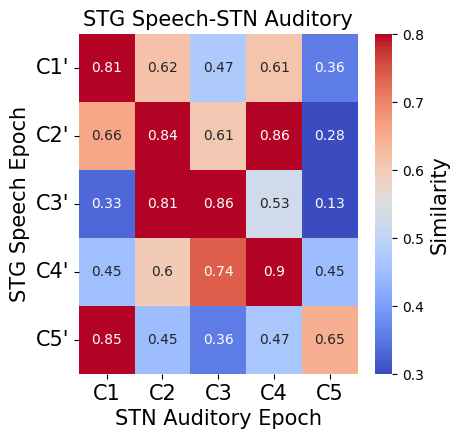

In [221]:
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_speech.components_

similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix
reordered_similarity_matrix = similarity_matrix[:, col_ind]

fig, ax = plt.subplots(figsize=(4.5, 4.5), dpi=100)
g = sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', ax=ax, 
            xticklabels=[f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], 
            yticklabels=[f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], 
            cbar_kws={'label': 'Similarity'}, vmax=0.8, vmin=0.3)
g.tick_params(axis='both', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(15)
ax.tick_params(axis='y', rotation=0)

ax.set_title("STG Speech-STN Auditory", fontsize=15)
ax.set_xlabel('STN Auditory Epoch', fontsize=15)
ax.set_ylabel('STG Speech Epoch', fontsize=15)

plt.show();

In [486]:
n_comp = 4

# STN auditory
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:2750]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=n_comp, init='warn', 
            random_state=0, solver='mu', alpha=0.001, 
            beta_loss='frobenius', tol=0.0001, 
            max_iter=250, alpha_W=0.2, l1_ratio=1)
NMF_model_stn_auditory = model.fit(NMF_input)

# STN speech
NMF_input = zscore_bseline(cue_mat_1)[:, 3250:]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=n_comp, init='warn', 
            random_state=0, solver='mu', alpha=0.001, 
            beta_loss='frobenius', tol=0.0001, 
            max_iter=250, alpha_W=0.2, l1_ratio=1)
NMF_model_stn_speech = model.fit(NMF_input)


# STG auditory
NMF_input = ecog_hg_good[:, 1000:2750]
#NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='warn', 
            random_state=0, solver='mu', alpha=0.001, 
            beta_loss='frobenius', tol=0.0001, 
            max_iter=250, alpha_W=0.2, l1_ratio=1)
NMF_model_stg_auditory = model.fit(NMF_input)

# STG speech
NMF_input = ecog_hg_good[:, 3250:]
#NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='warn', 
            random_state=0, solver='mu', alpha=0.001, 
            beta_loss='frobenius', tol=0.0001, 
            max_iter=250, alpha_W=0.2, l1_ratio=1)
NMF_model_stg_speech = model.fit(NMF_input)


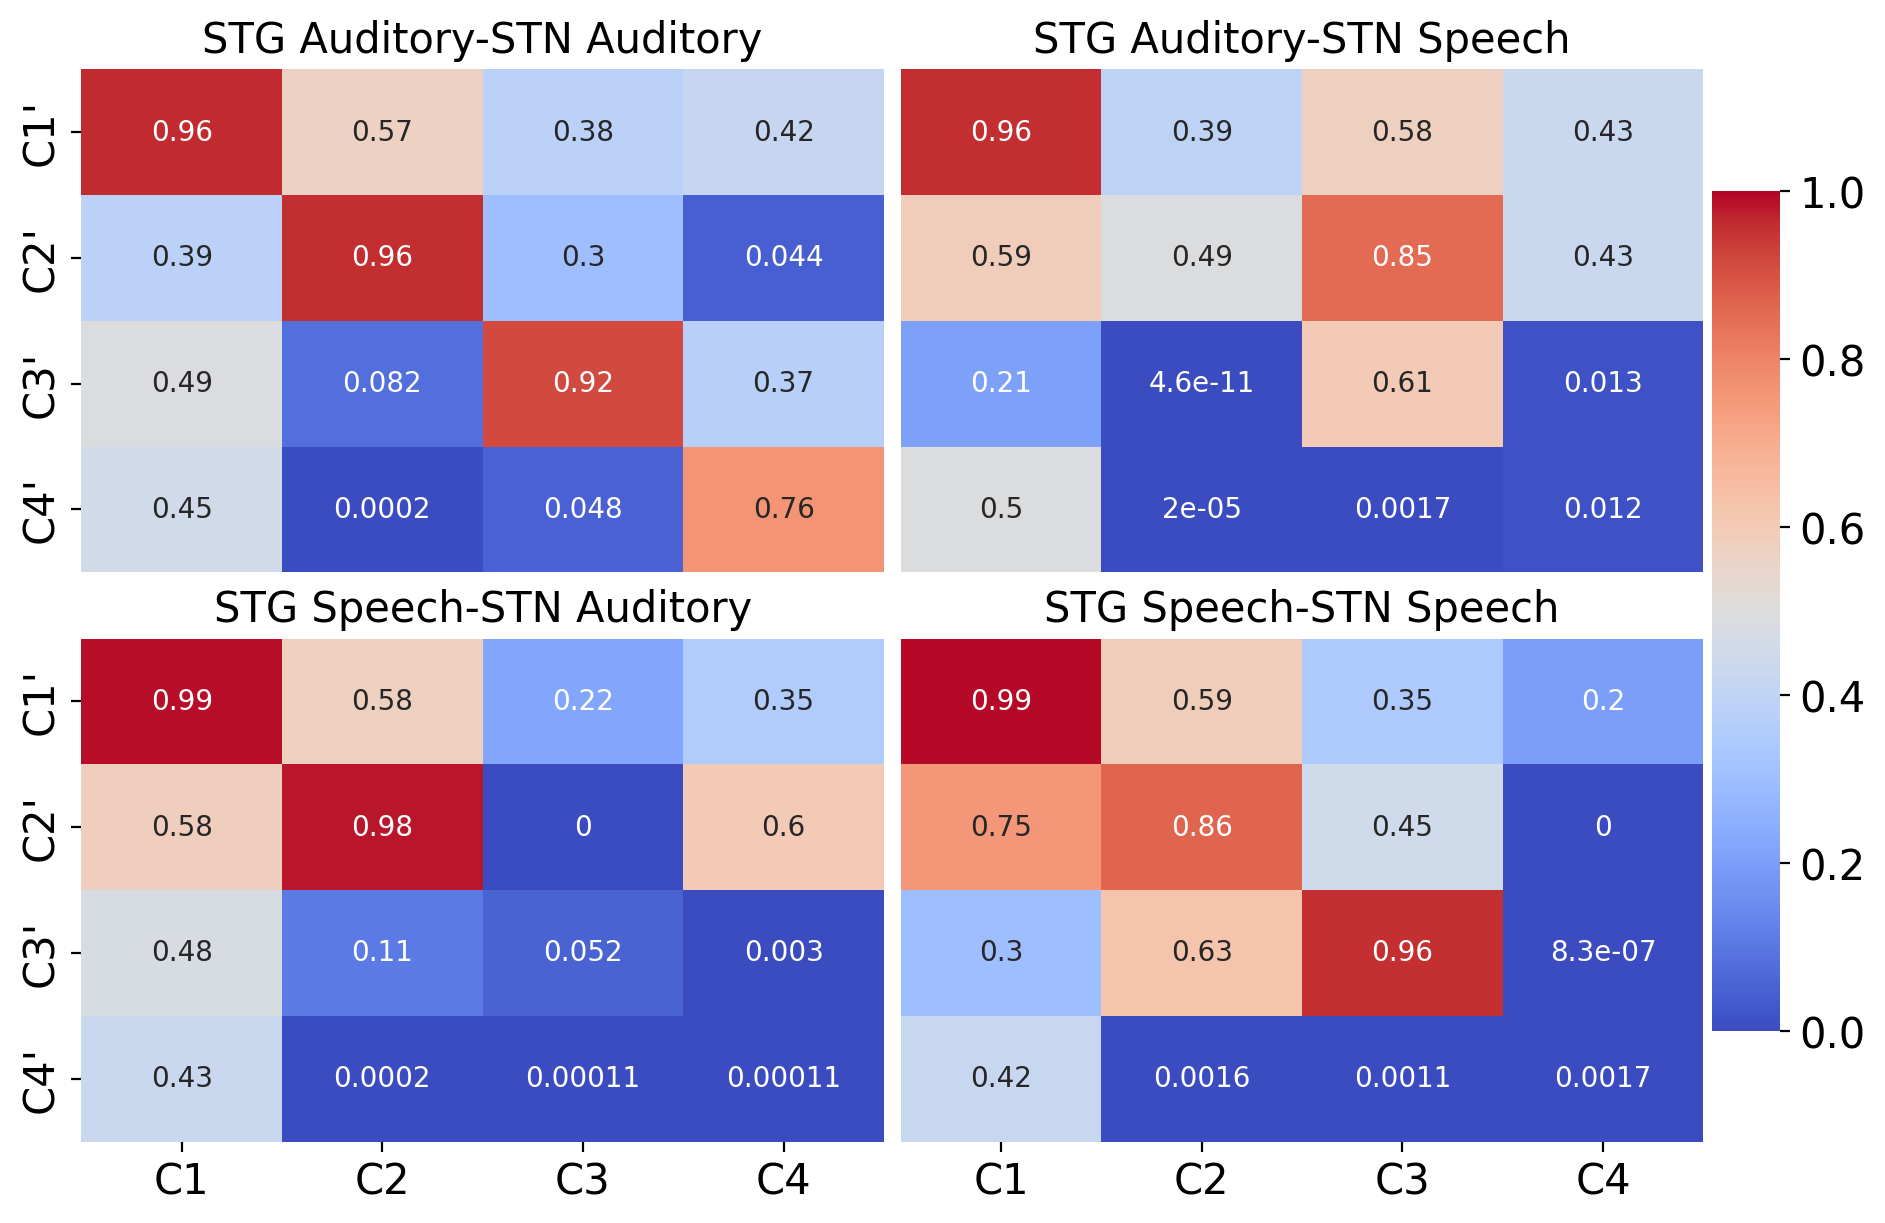

In [511]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 6), dpi=200, constrained_layout=True)
axs = axs.flatten()

# STG Auditory-STN Auditory
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_auditory.components_
similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[0], vmax=1, vmin=0, cbar=False)
axs[0].set_title("STG Auditory-STN Auditory", fontsize=15)
axs[0].set_yticklabels([f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], fontsize=15)
axs[0].set_xticks([])

# STG Auditory-STN Speech
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_auditory.components_
similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[1], vmax=1, vmin=0, cbar=False)
axs[1].set_title("STG Auditory-STN Speech", fontsize=15)
axs[1].set_xticks([])
axs[1].set_yticks([])

# STG Speech-STN Auditory
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_speech.components_
similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[2], vmax=1, vmin=0, cbar=False)
axs[2].set_title("STG Speech-STN Auditory", fontsize=15)
axs[2].set_yticklabels([f"C{i+1}'" for i in range(reordered_similarity_matrix.shape[0])], fontsize=15)
axs[2].set_xticklabels([f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], fontsize=15)

# STG Speech-STN Speech
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_speech.components_
similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

cbar_ax = fig.add_axes([1, 0.15, 0.04, 0.7])
axs3 = sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[3], vmax=1, vmin=0, cbar_ax=cbar_ax)
axs[3].set_title("STG Speech-STN Speech", fontsize=15)
axs[3].set_xticklabels([f"C{i+1}" for i in range(reordered_similarity_matrix.shape[0])], fontsize=15)
axs[3].set_yticks([])

cbar_ax.tick_params(labelsize=15)
#cb.outline.set_linewidth(0)

#plt.suptitle('Cosine similarity')
plt.show();

In [484]:
n_comp = 6

# STN auditory
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:2750]
NMF_input = NMF_input - NMF_input.min()

model = PCA(n_components=n_comp, 
            random_state=0)
NMF_model_stn_auditory = model.fit(NMF_input)

# STN speech
NMF_input = zscore_bseline(cue_mat_1)[:, 3250:]
NMF_input = NMF_input - NMF_input.min()

model = PCA(n_components=n_comp, 
            random_state=0)
NMF_model_stn_speech = model.fit(NMF_input)


# STG auditory
NMF_input = ecog_hg_good[:, 1000:2750]
NMF_input = NMF_input - NMF_input.min()
model = PCA(n_components=n_comp, 
            random_state=0)
NMF_model_stg_auditory = model.fit(NMF_input)

# STG speech
NMF_input = ecog_hg_good[:, 3250:]
NMF_input = NMF_input - NMF_input.min()
model = PCA(n_components=n_comp, 
            random_state=0)
NMF_model_stg_speech = model.fit(NMF_input)


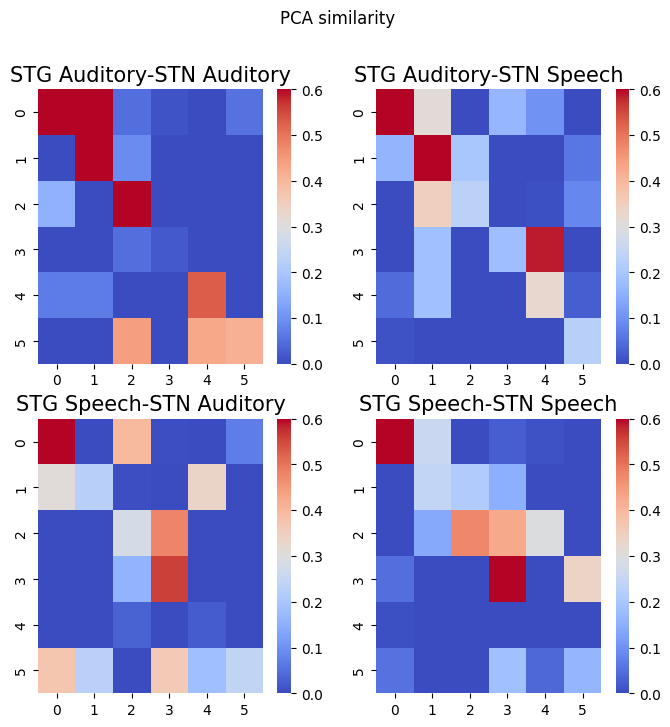

In [485]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), dpi=100)
axs = axs.flatten()

# STG Auditory-STN Auditory
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_auditory.components_
similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=False, cmap='coolwarm', 
            ax=axs[0], vmax=0.6, vmin=0)
axs[0].set_title("STG Auditory-STN Auditory", fontsize=15)

# STG Auditory-STN Speech
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_auditory.components_
similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=False, cmap='coolwarm', 
            ax=axs[1], vmax=0.6, vmin=0)
axs[1].set_title("STG Auditory-STN Speech", fontsize=15)

# STG Speech-STN Auditory
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_speech.components_
similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=False, cmap='coolwarm', 
            ax=axs[2], vmax=0.6, vmin=0)
axs[2].set_title("STG Speech-STN Auditory", fontsize=15)

# STG Speech-STN Speech
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_speech.components_
similarity_matrix = cosine_similarity(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=False, cmap='coolwarm', 
            ax=axs[3], vmax=0.6, vmin=0)
axs[3].set_title("STG Speech-STN Speech", fontsize=15)


plt.suptitle('PCA similarity')
plt.show();

In [364]:
from sklearn.metrics.pairwise import euclidean_distances
n_comp = 5

# STN auditory
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stn_auditory = model.fit(NMF_input)


# STN speech
NMF_input = zscore_bseline(cue_mat_1)[:, 3000:]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stn_speech = model.fit(NMF_input)


# STG auditory
NMF_input = ecog_hg_good[:, 1000 :3000]
NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stg_auditory = model.fit(NMF_input)


# STG speech
NMF_input = ecog_hg_good[:, 3000:]
NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='random', random_state=0)

NMF_model_stg_speech = model.fit(NMF_input)


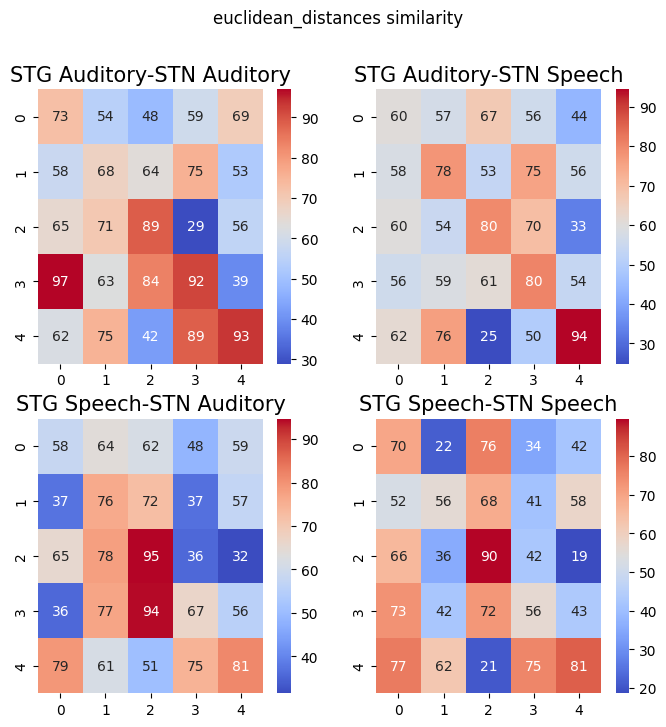

In [365]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), dpi=100)
axs = axs.flatten()

# STG Auditory-STN Auditory
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_auditory.components_

similarity_matrix = euclidean_distances(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[0])
axs[0].set_title("STG Auditory-STN Auditory", fontsize=15)


# STG Auditory-STN Speech
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_auditory.components_

similarity_matrix = euclidean_distances(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[1])
axs[1].set_title("STG Auditory-STN Speech", fontsize=15)


# STG Speech-STN Auditory
matrix_1 = NMF_model_stn_auditory.components_
matrix_2 = NMF_model_stg_speech.components_

similarity_matrix = euclidean_distances(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[2])
axs[2].set_title("STG Speech-STN Auditory", fontsize=15)


# STG Speech-STN Speech
matrix_1 = NMF_model_stn_speech.components_
matrix_2 = NMF_model_stg_speech.components_

similarity_matrix = euclidean_distances(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[3])
axs[3].set_title("STG Speech-STN Speech", fontsize=15)


plt.suptitle('euclidean_distances similarity')
plt.show();

In [370]:
n_comp = 5

# STN auditory
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=n_comp, init='warn', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.1, 
            max_iter=250, alpha_W=0.1, l1_ratio=2)

NMF_model_stn_auditory = model.fit(NMF_input)


# STN speech
NMF_input = zscore_bseline(cue_mat_1)[:, 3000:]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=n_comp, init='warn', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.1, 
            max_iter=250, alpha_W=0.1, l1_ratio=2)

NMF_model_stn_speech = model.fit(NMF_input)


# STG auditory
NMF_input = ecog_hg_good[:, 1000 :3000]
NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='warn', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.1, 
            max_iter=250, alpha_W=0.1, l1_ratio=2)

NMF_model_stg_auditory = model.fit(NMF_input)


# STG speech
NMF_input = ecog_hg_good[:, 3000:]
NMF_input = NMF_input - NMF_input.min()
model = NMF(n_components=n_comp, init='warn', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.1, 
            max_iter=250, alpha_W=0.1, l1_ratio=2)

NMF_model_stg_speech = model.fit(NMF_input)


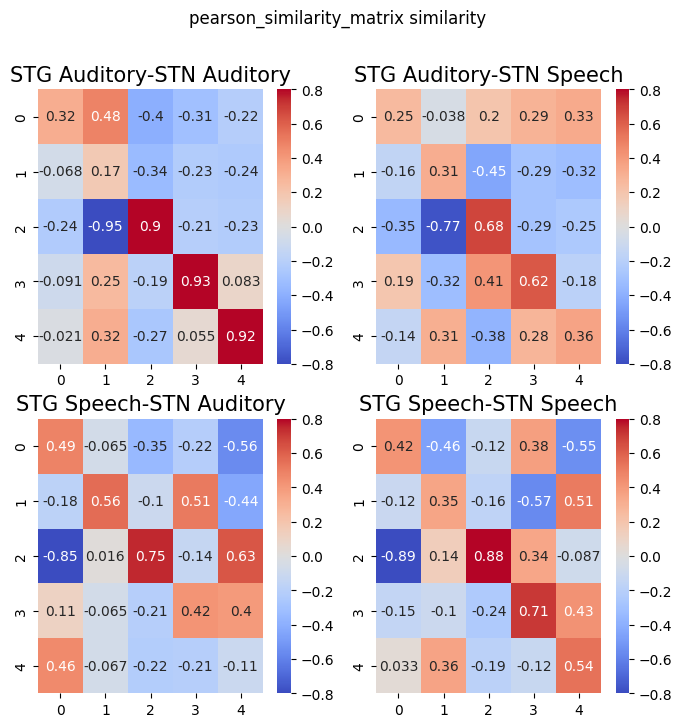

In [369]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), dpi=100)
axs = axs.flatten()

# STG Auditory-STN Auditory
matrix_1 = NMF_model_stn_auditory.components_.T
matrix_2 = NMF_model_stg_auditory.components_.T

similarity_matrix = pearson_similarity_matrix(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[0], vmax=0.8, vmin=-0.8)
axs[0].set_title("STG Auditory-STN Auditory", fontsize=15)


# STG Auditory-STN Speech
matrix_1 = NMF_model_stn_speech.components_.T
matrix_2 = NMF_model_stg_auditory.components_.T

similarity_matrix = pearson_similarity_matrix(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[1], vmax=0.8, vmin=-0.8)
axs[1].set_title("STG Auditory-STN Speech", fontsize=15)


# STG Speech-STN Auditory
matrix_1 = NMF_model_stn_auditory.components_.T
matrix_2 = NMF_model_stg_speech.components_.T

similarity_matrix = pearson_similarity_matrix(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[2], vmax=0.8, vmin=-0.8)
axs[2].set_title("STG Speech-STN Auditory", fontsize=15)


# STG Speech-STN Speech
matrix_1 = NMF_model_stn_speech.components_.T
matrix_2 = NMF_model_stg_speech.components_.T

similarity_matrix = pearson_similarity_matrix(matrix_1, matrix_2)
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)
reordered_similarity_matrix = similarity_matrix[:, col_ind]

sns.heatmap(reordered_similarity_matrix, annot=True, cmap='coolwarm', 
            ax=axs[3], vmax=0.8, vmin=-0.8)
axs[3].set_title("STG Speech-STN Speech", fontsize=15)


plt.suptitle('pearson_similarity_matrix similarity')
plt.show();

In [21]:
matrix_1.shape

(5, 2000)

In [23]:
np.dot(matrix_1[0], matrix_2[1])
np.dot(matrix_1[1], matrix_2[0])

2180.9427533264134

3172.8507974373188

In [14]:
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=4, init='random', random_state=0)
NMF_model_auditory = model.fit(NMF_input)

In [15]:
NMF_input = ecog_hg_good[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()
model_stg = NMF(n_components=4, init='random', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.0000001, 
            max_iter=250, alpha_W=0.01)
NMF_output = model_stg.fit_transform(NMF_input)


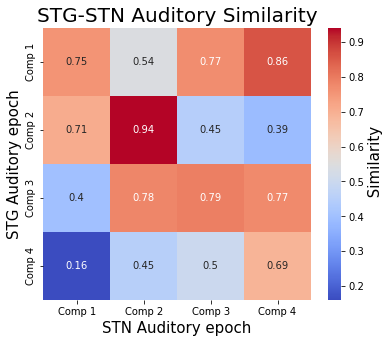

In [16]:
# Example data: two matrices of 5 components over time
# Each matrix has shape (time_points, 5), assuming 10 time points
matrix_1 = NMF_model_auditory.components_.T
matrix_2 = model_stg.components_.T

# Compute the cosine similarity between the components of the two matrices
# Transpose the matrices so that the cosine similarity is calculated between columns (components)
similarity_matrix = cosine_similarity(matrix_1.T, matrix_2.T)


# Use the Hungarian algorithm to find the optimal reordering of the second matrix
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix

# Reorder the second matrix based on the Hungarian algorithm result
reordered_similarity_matrix = similarity_matrix[:, col_ind]


# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(reordered_similarity_matrix, annot=True, cmap="coolwarm", ax=ax, 
            xticklabels=[f"Comp {i+1}" for i in range(4)], 
            yticklabels=[f"Comp {i+1}" for i in range(4)], 
            cbar_kws={'label': ' Similarity'})
ax.figure.axes[-1].yaxis.label.set_size(15)
#ax.figure.axes[-1].tick_params=

ax.set_title("STG-STN Auditory Similarity", fontsize=20)
ax.set_xlabel('STN Auditory epoch', fontsize=15)
ax.set_ylabel('STG Auditory epoch', fontsize=15)

plt.show();

In [17]:
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()

model = NMF(n_components=3, init='random', random_state=0)
NMF_model_auditory = model.fit(NMF_input)

In [18]:
NMF_input = ecog_hg_good[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()
model_stg = NMF(n_components=3, init='random', 
            random_state=0, solver='mu', 
            beta_loss='frobenius', tol=0.0000001, 
            max_iter=250, alpha_W=0.01)
NMF_output = model_stg.fit_transform(NMF_input)


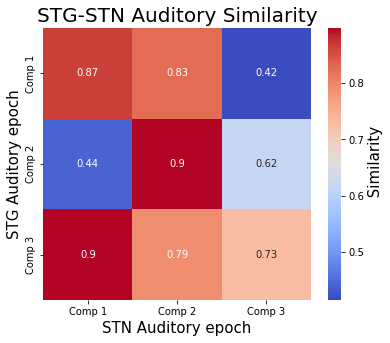

In [19]:
# Example data: two matrices of 5 components over time
# Each matrix has shape (time_points, 5), assuming 10 time points
matrix_1 = NMF_model_auditory.components_.T
matrix_2 = model_stg.components_.T

# Compute the cosine similarity between the components of the two matrices
# Transpose the matrices so that the cosine similarity is calculated between columns (components)
similarity_matrix = cosine_similarity(matrix_1.T, matrix_2.T)


# Use the Hungarian algorithm to find the optimal reordering of the second matrix
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix

# Reorder the second matrix based on the Hungarian algorithm result
reordered_similarity_matrix = similarity_matrix[:, col_ind]


# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(reordered_similarity_matrix, annot=True, cmap="coolwarm", ax=ax, 
            xticklabels=[f"Comp {i+1}" for i in range(3)], 
            yticklabels=[f"Comp {i+1}" for i in range(3)], 
            cbar_kws={'label': ' Similarity'})
ax.figure.axes[-1].yaxis.label.set_size(15)
#ax.figure.axes[-1].tick_params=

ax.set_title("STG-STN Auditory Similarity", fontsize=20)
ax.set_xlabel('STN Auditory epoch', fontsize=15)
ax.set_ylabel('STG Auditory epoch', fontsize=15)

plt.show();

In [20]:
def shuffle_matrix(matrix):
    """Shuffles the elements of a matrix in-place."""
    flattened = matrix.ravel()  # Flatten the matrix
    np.random.shuffle(flattened)  # Shuffle the flattened array
    matrix[:] = flattened.reshape(matrix.shape)  # Reshape and assign back
    return matrix

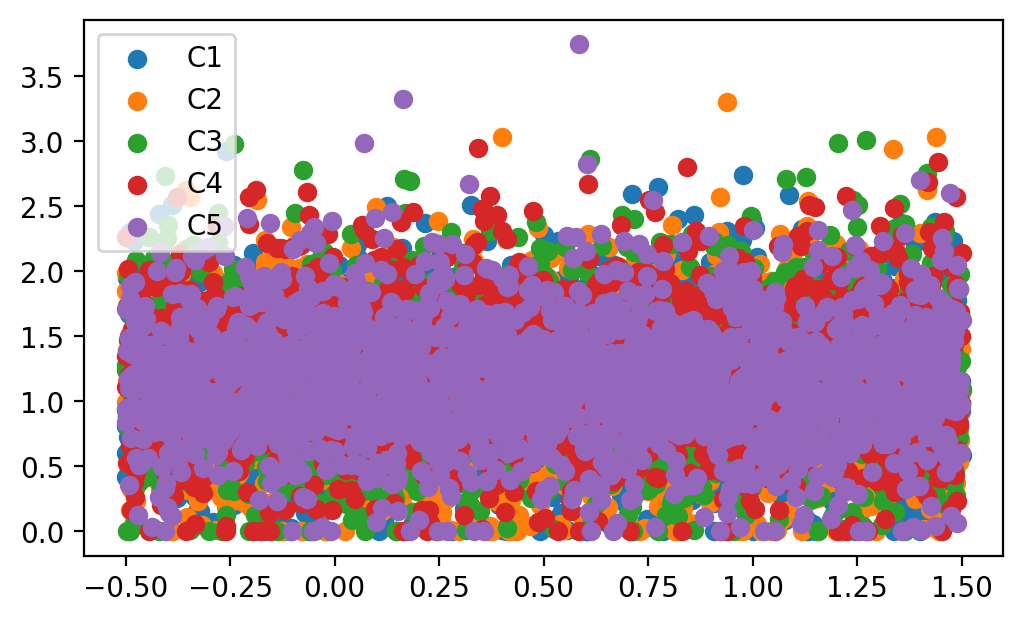

In [21]:
NMF_input = zscore_bseline(cue_mat_1)[:, 1000:3000]
NMF_input = NMF_input - NMF_input.min()
NMF_input_shuffle = shuffle_matrix(NMF_input)

model = NMF(n_components=5, init='random', random_state=0)
NMF_model_auditory_shuffle = model.fit(NMF_input_shuffle)


fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

x_lab = np.linspace(-0.5, 1.5, 2000)

plt.scatter(x=x_lab, y=NMF_model_auditory_shuffle.components_[0], label='C1')
plt.scatter(x=x_lab, y=NMF_model_auditory_shuffle.components_[1], label='C2')
plt.scatter(x=x_lab, y=NMF_model_auditory_shuffle.components_[2], label='C3')
plt.scatter(x=x_lab, y=NMF_model_auditory_shuffle.components_[3], label='C4')
plt.scatter(x=x_lab, y=NMF_model_auditory_shuffle.components_[4], label='C5')

plt.legend()
plt.show();

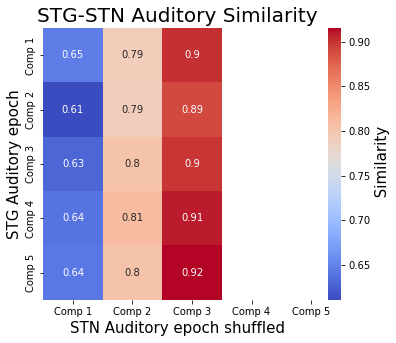

In [22]:
# Example data: two matrices of 5 components over time
# Each matrix has shape (time_points, 5), assuming 10 time points
matrix_1 = NMF_model_auditory_shuffle.components_.T
matrix_2 = model_stg.components_.T

# Compute the cosine similarity between the components of the two matrices
# Transpose the matrices so that the cosine similarity is calculated between columns (components)
similarity_matrix = cosine_similarity(matrix_1.T, matrix_2.T)


# Use the Hungarian algorithm to find the optimal reordering of the second matrix
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix

# Reorder the second matrix based on the Hungarian algorithm result
reordered_similarity_matrix = similarity_matrix[:, col_ind]


# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(reordered_similarity_matrix, annot=True, cmap="coolwarm", ax=ax, 
            xticklabels=[f"Comp {i+1}" for i in range(5)], 
            yticklabels=[f"Comp {i+1}" for i in range(5)], 
            cbar_kws={'label': ' Similarity'})
ax.figure.axes[-1].yaxis.label.set_size(15)
#ax.figure.axes[-1].tick_params=

ax.set_title("STG-STN Auditory Similarity", fontsize=20)
ax.set_xlabel('STN Auditory epoch shuffled', fontsize=15)
ax.set_ylabel('STG Auditory epoch', fontsize=15)

plt.show();

In [23]:
# Example data: two matrices of 5 components over time
# Each matrix has shape (time_points, 5), assuming 10 time points
matrix_1 = NMF_model_auditory_shuffle.components_
matrix_2 = model_stg.components_

# Compute the cosine similarity between the components of the two matrices
# Transpose the matrices so that the cosine similarity is calculated between columns (components)
similarity_matrix = pearson_similarity_matrix(matrix_1.T, matrix_2.T)


# Use the Hungarian algorithm to find the optimal reordering of the second matrix
row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix

# Reorder the second matrix based on the Hungarian algorithm result
reordered_similarity_matrix = similarity_matrix[:, col_ind]


# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(reordered_similarity_matrix, annot=True, cmap="coolwarm", ax=ax, 
            xticklabels=[f"Comp {i+1}" for i in range(5)], 
            yticklabels=[f"Comp {i+1}" for i in range(5)], 
            cbar_kws={'label': ' Similarity'})
ax.figure.axes[-1].yaxis.label.set_size(15)
#ax.figure.axes[-1].tick_params=

ax.set_title("STG-STN Auditory Similarity", fontsize=20)
ax.set_xlabel('STN Auditory epoch shuffled', fontsize=15)
ax.set_ylabel('STG Auditory epoch', fontsize=15)

plt.show();

IndexError: index 3 is out of bounds for axis 1 with size 3

In [24]:
permutation_matrix = []

for item in range(1000):
    # Example data: two matrices of 5 components over time
    # Each matrix has shape (time_points, 5), assuming 10 time points
    matrix_1 = NMF_model_auditory_shuffle.components_
    matrix_2 = model_stg.components_
    
    # Compute the cosine similarity between the components of the two matrices
    # Transpose the matrices so that the cosine similarity is calculated between columns (components)
    similarity_matrix = pearson_similarity_matrix(matrix_1.T, matrix_2.T)
    
    
    # Use the Hungarian algorithm to find the optimal reordering of the second matrix
    row_ind, col_ind = linear_sum_assignment(-similarity_matrix)  # Maximize similarity, so negate the matrix
    
    # Reorder the second matrix based on the Hungarian algorithm result
    reordered_similarity_matrix = similarity_matrix[:, col_ind]

    permutation_matrix.append(reordered_similarity_matrix.tolist())

permutation_matrix = np.array(permutation_matrix)
permutation_matrix.shape

IndexError: index 3 is out of bounds for axis 1 with size 3

In [25]:
permutation_matrix.mean(axis=0)

AttributeError: 'list' object has no attribute 'mean'

AttributeError: 'list' object has no attribute 'mean'

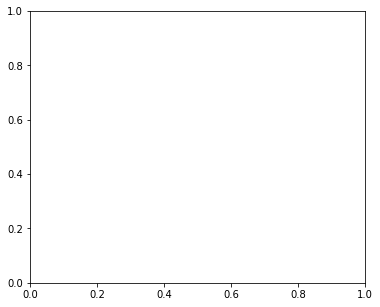

In [26]:
# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(permutation_matrix.mean(axis=0), annot=True, cmap="coolwarm", ax=ax, 
            xticklabels=[f"Comp {i+1}" for i in range(5)], 
            yticklabels=[f"Comp {i+1}" for i in range(5)], 
            cbar_kws={'label': ' Similarity'}, vmin=-0.6, vmax=0.8)
ax.figure.axes[-1].yaxis.label.set_size(15)
#ax.figure.axes[-1].tick_params=

ax.set_title("STG-STN (shuffled) Auditory Similarity", fontsize=20)
ax.set_xlabel('STN Auditory epoch shuffled', fontsize=15)
ax.set_ylabel('STG Auditory epoch', fontsize=15)

plt.show();

In [27]:
np.std(permutation_matrix, axis=0)

nan